In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [10]:
df= pd.read_csv('spam.csv',encoding='latin-1')

In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2126,ham,You do got a shitload of diamonds though,NaN,NaN,NaN
1508,ham,Sounds like something that someone testing me ...,NaN,NaN,NaN
968,ham,Are you willing to go for aptitude class.,NaN,NaN,NaN
966,ham,I am not sure about night menu. . . I know onl...,NaN,NaN,NaN
2666,ham,"* Was a nice day and, impressively, i was sens...",NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning
# 2.EDA
# 3. Text Preprocessing
# 4 Model Building
# 5 Evaluation
# 6 Improvement
# 7 Website
# 8 Deploy

# Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last coloumn

In [17]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [19]:
df.sample(5)

,v1,v2
1,ham,Ok lar... Joking wif u oni...
4211,spam,Missed call alert. These numbers called but le...
5009,ham,"By the way, 'rencontre' is to meet again. Moun..."
2683,ham,I'm okay. Chasing the dream. What's good. What...
2613,ham,Thanks for sending this mental ability question..


In [21]:
 #rename the cols
    
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [22]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder= LabelEncoder()

In [26]:
df['target']=encoder.fit_transform(df['target'])

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [30]:
df=df.drop_duplicates(keep='first')

# EDA

In [33]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2a8f4197880>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

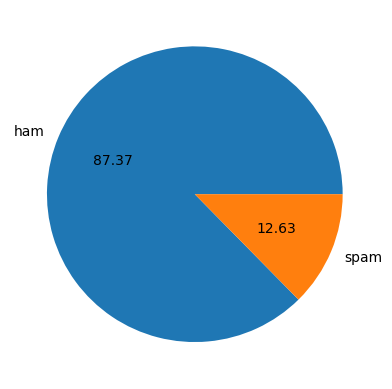

In [41]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [ ]:
# Data is imbalanced 

In [42]:
import nltk

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MODASUD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
df['num_character']=df['text'].apply(len)

In [48]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [53]:
#num of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [54]:
df

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [55]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [56]:
df.head()

,target,text,num_character,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
df[['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [61]:
df[df['target']==0][['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [62]:
df[df['target']==1][['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [ ]:
#Plot the histograme

In [65]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

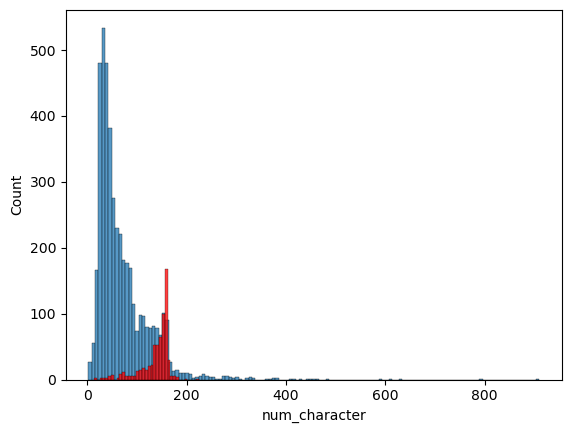

In [68]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

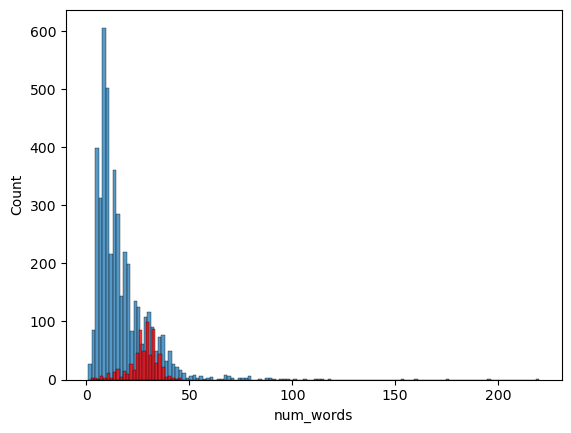

In [69]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [ ]:
# Correlation coefficent

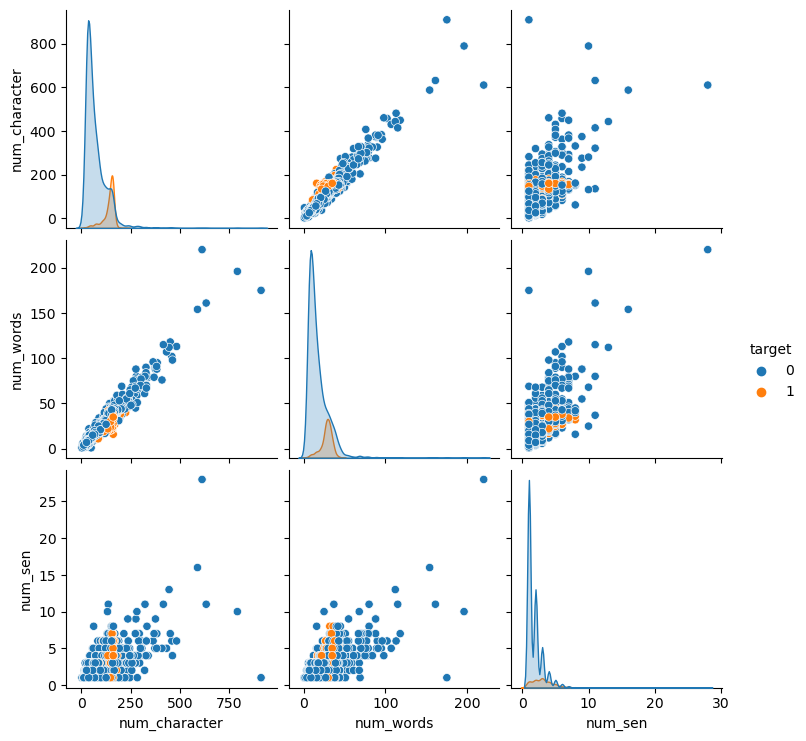

In [70]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

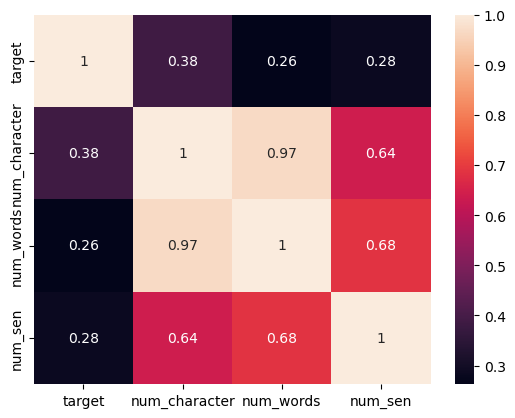

In [73]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

1.Lower Case
2.Tokenization
3.Removing special character
4.Removing stop words and punctation
5.Stemming